# [作業重點]
仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [33]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dir_data = 'desktop/data/'

In [34]:
f_app_train = os.path.join(dir_data,'application_train.csv')
print('Path of read data is :%s '%(f_app_train))

Path of read data is :desktop/data/application_train.csv 


In [35]:
app_train = pd.read_csv(f_app_train)
app_train.shape


(307511, 122)

In [36]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <=2 :
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
#app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
#app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED_ANOM'] = app_train['DAYS_EMPLOYED'] == 365243
app_train['DAYS_EMPLOYED'].replace({365243:np.nan},inplace = True)


# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

seaborn的背景主題，適用於不同的應用和人群偏好：

darkgrid 黑色網格（默認）
whitegrid 白色網格
dark 黑色背景
white 白色背景
ticks 應該是四周都有刻度線的白背景


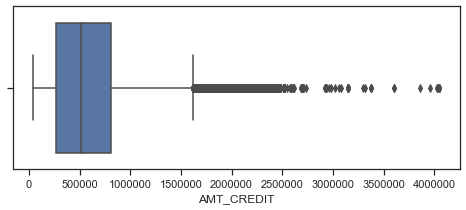

In [44]:
import seaborn as sns

plt.figure(figsize=(8,3))
sns.set(style='ticks')
ax = sns.boxplot(x=app_train['AMT_CREDIT'])

In [49]:
#確定圖形邊界

x = app_train[app_train['AMT_ANNUITY']<0.2e8]['AMT_ANNUITY']
y = app_train[app_train['AMT_ANNUITY']<0.2e8]['AMT_CREDIT']

(0, 200000.0)

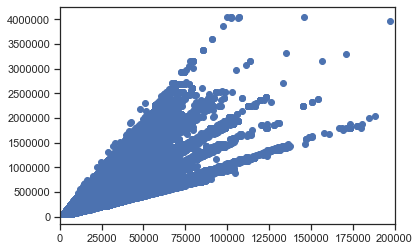

In [55]:
plt.scatter(x=x,y=y)
plt.xlim(0,0.2e6)

In [ ]:
#養老金與信用關係＝> 可以看出AMT_ANNUITY與AMT_CREDIT呈現正相關,AMT_ANNUITY越高,其AMT_CREDIT呈現正向增長